In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','notebook'])

## RMSD Calculation

In [2]:
#Read all the trajectories
ku04amp01_pea= mda.Universe('ku04amp01_pea_complex/sys_prod/prod_ku04amp01_pea_complex_compact_compact.tpr', 'ku04amp01_pea_complex/sys_prod/prod_ku04amp01_pea_complex_compact_compact.xtc')


## Hydrogen Bond Analysis

### H-bond parameters
  - *d_h_cutoff* (Å) [1.2] : Distance cutoff used for finding donor-hydrogen pairs
  - *d_a_cutoff* (Å) [3.0] : Distance cutoff for hydrogen bonds. This cutoff refers to the D-A distance.
  - *d_h_a_angle_cutoff* (degrees) [150] : D-H-A angle cutoff for hydrogen bonds.

In [6]:
from tqdm.notebook import tqdm

peptide_residues_selection = 'protein and (resid 18 or resid 21 or resid 17 or resid 16)'
ligand_residues_selection = 'resname EA1'
peptide_residues = ku04amp01_pea.select_atoms(peptide_residues_selection)
ligand_residues = ku04amp01_pea.select_atoms(ligand_residues_selection)
times = []
com_distances = []
for ts in tqdm(ku04amp01_pea.trajectory):
    times.append(ku04amp01_pea.trajectory.time)
    peptide_com = peptide_residues.center_of_mass()
    ligand_com = ligand_residues.center_of_mass()
    distance = np.linalg.norm(peptide_com - ligand_com)
    com_distances.append(distance)

# Optionally, convert to a numpy array for further analysis
times = np.array(times)
com_distances = np.array(com_distances)

  0%|          | 0/5001 [00:00<?, ?it/s]

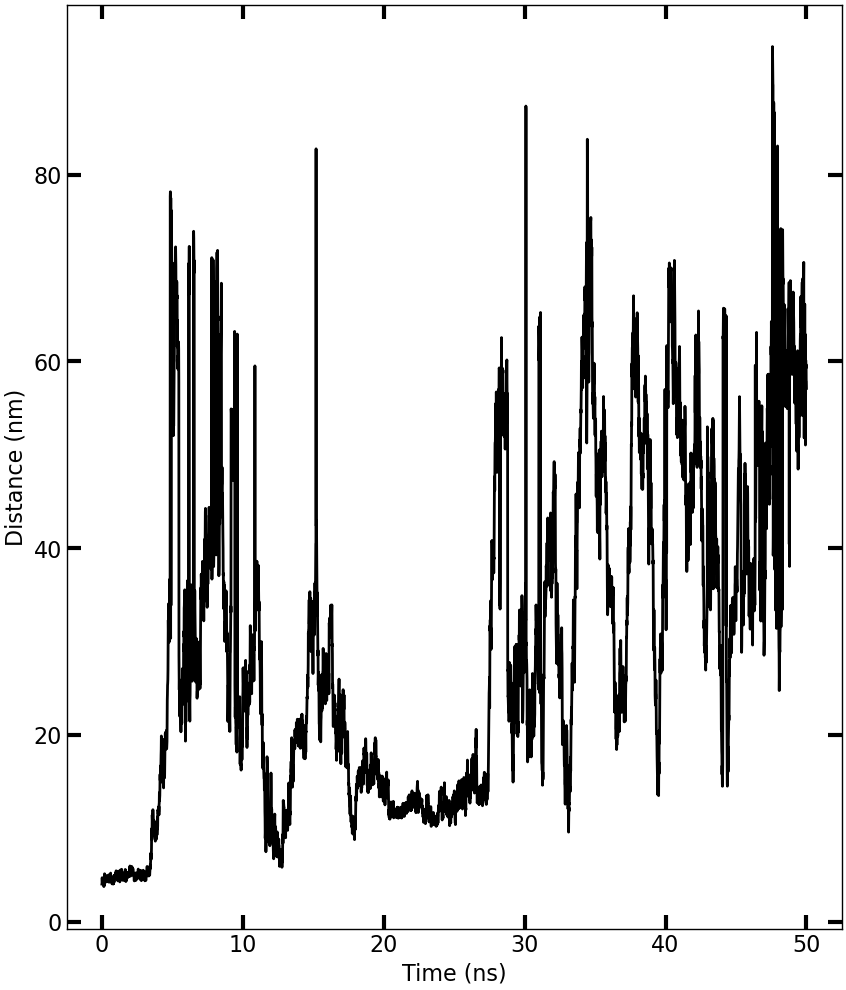

In [7]:
fig, ax = plt.subplots(figsize=(10, 12))

ax.plot(times/1000, com_distances, color='black')
ax.minorticks_off()
ax.tick_params(which='major', length=10, width=3)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Distance (nm)')
plt.savefig('ku04amp01_pea_complex_distance.png', dpi=600, bbox_inches='tight')